# Tepelné ztráty

### Zadání

Určete tepelné ztráty zateplené stěny a porovnejte časovou návratnost investice s nezateplenou stěnou. Zateplená
stěna je z železobetonu a na vnitřní straně je omítnuta vápennou omítkou, izolace z vnější
strany je omítnuta perlitovou omítkou.

* Průměrná teplota uvnitř $T_{in}$ = 22 &deg;C

* Průměrná teplota venku $T_{out}$ = 6 &deg;C

* Plocha stěny $S$ = 200 $m^{2}$

* Tepelná vodivost železobetonu $\lambda_{bet}$ = 1,43 [$W$⸱$m^{-1}$⸱$K^{-1}$]

* Tepelná vodivost perlitové omítky $\lambda_{per}$ = 0,1 [$W$⸱$m^{-1}$⸱$K^{-1}$]

* Tepelná vodivost vápenné omítky $\lambda_{vap}$ = 0,88 [$W$⸱$m^{-1}$⸱$K^{-1}$]

* Součinitel přestupu tepla na vnitřní straně $\alpha_{in}$ = 7 [$W$⸱$m^{-2}$⸱$K^{-1}$]

* Součinitel přestupu tepla na vnější straně $\alpha_{out}$ = 17 [$W$⸱$m^{-2}$⸱$K^{-1}$]

* Tloušťka stěny $\delta_{bet}$ = 0,2 $m$

* Tloušťka izolace $\delta_{izol}$ = 0,1 $m$

* Tloušťka perlitové omítky $\delta_{per}$ = 0,015 $m$

* Tloušťka vápenné omítky $\delta_{vap}$ = 0,015 $m$

* Cena plynu $C_{plyn}$ = 4 $Kč$⸱$kWhod^{-1}$

* Tepelná vodivost a cena za 1 $m^{2}$ izolace viz katalog.

### Teoretický rozbor

Pří výpočtu tepelných ztrát se používá analogie na Ohmův zákon. Tedy platí že:

\begin{align*}
  I = \frac{U}{R} → \dot{Q} = \frac{\Delta T}{R}\\
\end{align*}

Kde:

* $Q$ – tepelný tok [$W$]
* $T$ – rozdíl teplot [$K$] 
* $R$ – tepelný odpor [$K$⸱$W^{-1}$]

Tepelný odpor lze dále vyjádřit jako: 

\begin{align*}
  R = \frac{\delta}{\lambda S}
\end{align*}

Kde:

* $\delta$ – tloušťka stěny [$m$]
* $\lambda$ – tepelná vodivost [$W$⸱$m^{-1}$⸱$K^{-1}$]
* $S$ – obsah [$m^{2}$]

Zvážíme-li vliv přestupu tepla i mezi vzduchem a stěnou, výpočet odporu je:

\begin{align*}
  R = \frac{1}{\alpha S}
\end{align*}

Kde:

* $\alpha$ – součinitel přestupu tepla [$W$⸱$m^{-2}$⸱$K^{-1}$]

Pokud se stěna skládá z více vrstev, tak se jednotlivé odpory sčítají, podobně jako tomu je
u sériově zapojeného odporu. Celkový tepelný tok stěnou je pak dán vztahem:


$$  \dot{Q} = \frac{\Delta T}{\frac{1}{\alpha_{in} S} + \displaystyle\sum_{i=1}^{n} \frac{\delta}{\lambda S} +\frac{1}{\alpha_{out} S}} $$

Kde:
* $\alpha_{in}$ – součinitel přestupu tepla na vnitřní straně stěny [$W$⸱$m^{-2}$⸱$K^{-1}$]

* $\alpha_{out}$ – součinitel přestupu tepla na vnější straně stěny [$W$⸱$m^{-2}$⸱$K^{-1}$]

* $\Delta T$ – rozdíl teplot [$K$]

* $\dot{Q}$ – tepelné ztráty [$W$]


Při výpočtu návratnosti investice se vychází z rovnice, kde na jedné straně je cena izolace
(zanedbáváme stavební náklady) spolu s náklady na vytápění zateplené stěny a na druhé
straně náklady na vytápění nezateplené stěny:

$$ C_{izol} + \dot{Q}_{izol} ⸱ C_{plyn} ⸱ t_{inv} = \dot{Q}_{neizol} ⸱ C_{plyn} ⸱ t_{inv} $$

$$ t_{inv} = \frac{C_{izol}}{C_{plyn} ⸱ (\dot{Q}_{neizol} - \dot{Q}_{izol})} $$

Kde:
* $C_{izol}$ – cena materiálu izolace [$Kč$]

* $C_{plyn}$ – cena plynu [$Kč$⸱$kWhod^{-1}$]

* $\dot{Q}_{izol}$ – tepelné ztráty izolovanou stěnou [$kW$]

* $\dot{Q}_{neizol}$ – tepelné ztráty neizolovanou stěnou [$kW$]

* $t_{inv}$ – návratnost investice [$hod$]

### Program

Zadané hodnoty:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

S = 200    # m2
T_in = 22    # stupne C
T_out = 6   # stupne C
lam_vap_omit = 0.88 # W/m*K
lam_bet = 1.43 # W/m*K
lam_perl_omit = 0.1 # W/m*K

alf_in = 7 # W/m2K
alf_out = 17 # W/m2K

l_1 = 0.015 # m vapenná omitka
l_2 = 0.2 # m beton
l_3 = 0.1 # m  izolace
l_4 = 0.015 # m perlitová omítka

C_plyn = 4 # Kč/kWh


Import dat

In [2]:
seznam = pd.read_excel('data.xlsx',index_col=0)

Výpočet dat

In [3]:
vyber_tloustky = seznam[seznam['Šířka mm'] == l_2*1000].copy(deep=True)
vyber_tloustky = vyber_tloustky.reset_index(drop=True)

R_in = 1/(alf_in * S)
R_vap_omit =  l_1/(lam_vap_omit * S)
R_bet = l_2/(lam_bet * S)
R_izol = l_3/(vyber_tloustky.loc[:,'Součinitel tepelné vodivosti W/K*m'] * S)
R_perl_omit = l_4/(lam_perl_omit * S)
R_out = 1/(alf_out * S)

R_zat = R_in + R_vap_omit + R_bet + R_izol + R_perl_omit + R_out
R_nez = R_in + R_vap_omit + R_bet + R_perl_omit + R_out

Q_hol_sten = (T_in - T_out)/R_nez

def cas_navratnosti(C_plyn,Q_hol_sten,Q_izol_sten,C_izol):
    Q_hol_sten = (Q_hol_sten/1000) #přepočet na kW
    Q_izol_sten = (Q_izol_sten/1000) #přepočet na kW
    T = (C_izol/((Q_hol_sten - Q_izol_sten)*C_plyn))/24 #den
    return T

vyber_tloustky['Tepelné ztráty - W'] = (T_in - T_out)/R_zat


#vyber_tloustky['Cena - Kč'] = S * vyber_tloustky['Cena s DPH Kč/m²']
vyber_tloustky['Cena - Kč'] = S * vyber_tloustky['Jednotka Kč/m²']


vyber_tloustky['Návratnost investice - dny'] = cas_navratnosti(
    C_plyn = C_plyn,
    Q_hol_sten = Q_hol_sten,
    Q_izol_sten = vyber_tloustky['Tepelné ztráty - W'],
    C_izol = vyber_tloustky['Cena - Kč'])


vyber_tloustky;

Vykreslení grafu

,Označení,Množství v balení m²,Cena s DPH m³,Jednotka Kč/m²,Množství požadované Kč/m³,Součinitel tepelné vodivosti W/K*m,Šířka mm,Typ,Tepelné ztráty - W,Cena - Kč,Návratnost investice - dny
6,Styrotrade styro EPS 70F - fasádní polystyren ...,1.0,0.2,241.76,1208.79,0.039,200,Polystyren,1041.433147,48352.0,95.927041


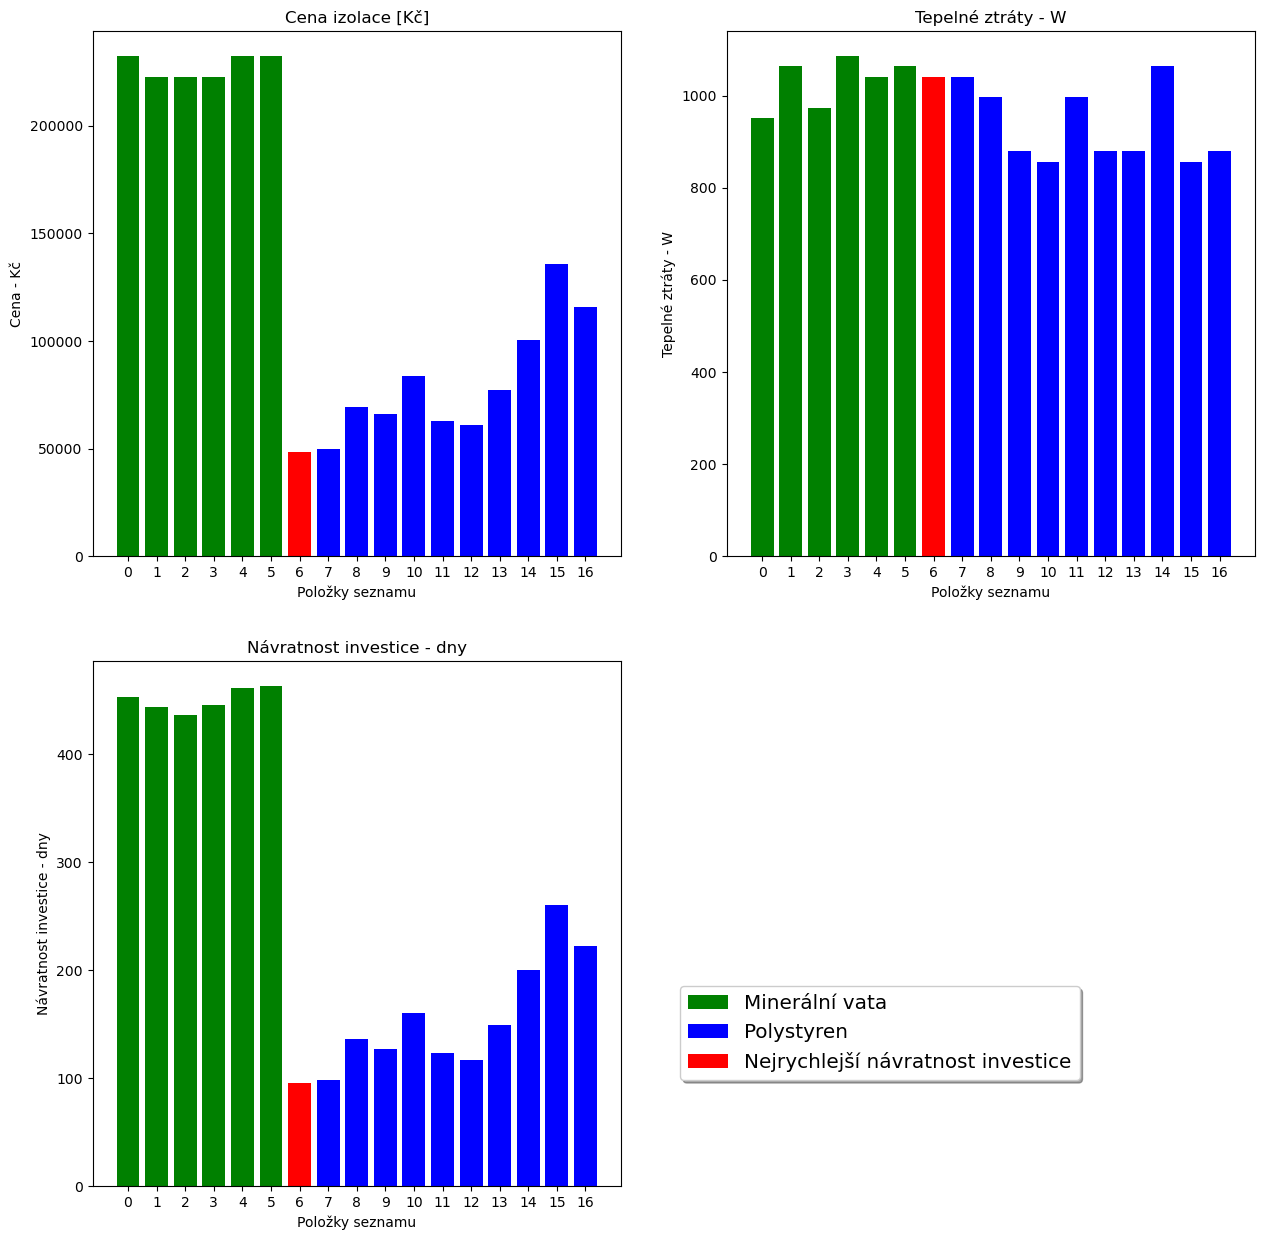

In [4]:
index_pomer = vyber_tloustky.index.values[vyber_tloustky['Návratnost investice - dny'] == 
                                          vyber_tloustky['Návratnost investice - dny'].min().
                                          tolist()]

vata_vyber = vyber_tloustky.loc[vyber_tloustky['Typ'] == 'Vata']
poly_vyber = vyber_tloustky.loc[vyber_tloustky['Typ'] == 'Polystyren']

min_tep_ztraty = (vyber_tloustky['Návratnost investice - dny'].min())*0.9
max_tep_ztraty = (vyber_tloustky['Návratnost investice - dny'].max())*1.1

ymin_graf = (vyber_tloustky['Tepelné ztráty - W'].min())*0.95
ymax_graf = (vyber_tloustky['Tepelné ztráty - W'].max())*1.05
xmin_graf = (vyber_tloustky['Cena - Kč'].min())*0.95
xmax_graf = (vyber_tloustky['Cena - Kč'].max())*1.05

max_osa = len(vyber_tloustky.index)

tick_spacing = 1

gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(gs[0,0])
#ax1.plot([0,2])
ax1.bar(vata_vyber.index.values,vata_vyber['Cena - Kč'],color= 'g')
ax1.bar(poly_vyber.index.values,poly_vyber ['Cena - Kč'],color= 'b')
ax1.bar(index_pomer,vyber_tloustky['Cena - Kč'][index_pomer],color= 'r')
ax1.set_title('Cena izolace [Kč]')
ax1.xaxis.set_ticks(np.arange(0, max_osa,1))
ax1.set(xlabel='Položky seznamu', ylabel='Cena - Kč')


ax2 = fig.add_subplot(gs[0,1])
#ax2.plot([0,2])
ax2.bar(vata_vyber.index.values,vata_vyber['Tepelné ztráty - W'],color= 'g')
ax2.bar(poly_vyber.index.values,poly_vyber['Tepelné ztráty - W'],color= 'b')
ax2.bar(index_pomer,vyber_tloustky['Tepelné ztráty - W'][index_pomer],color= 'r')
ax2.set_title('Tepelné ztráty - W')
#ax2.plot([0,0])
ax2.xaxis.set_ticks(np.arange(0, max_osa,1))
ax2.set(xlabel='Položky seznamu', ylabel='Tepelné ztráty - W')


ax3 = fig.add_subplot(gs[1,0])
#ax3.plot([0,1])
ax3.bar(vata_vyber.index.values,vata_vyber['Návratnost investice - dny'],color= 'g',
        label="Minerální vata")
ax3.bar(poly_vyber.index.values,poly_vyber['Návratnost investice - dny'],color= 'b',
        label="Polystyren")
ax3.bar(index_pomer,vyber_tloustky['Návratnost investice - dny'][index_pomer],color= 'r',
       label="Nejrychlejší návratnost investice")
ax3.set_title('Návratnost investice - dny')
ax3.xaxis.set_ticks(np.arange(0, max_osa,1))
ax3.set(xlabel='Položky seznamu', ylabel='Návratnost investice - dny')

#l6 = plt.legend(bbox_to_anchor=(0.4,0.8), loc="upper right")
#fig.legend(loc='upper center', shadow=True, fontsize='x-large',ncol=1)

fig.legend(bbox_to_anchor=(0.65,0.25),loc='upper center', shadow=True, fontsize='x-large',ncol=1)

hledana_izolace = vyber_tloustky.loc[vyber_tloustky['Návratnost investice - dny'] == 
                                     vyber_tloustky['Návratnost investice - dny'].min()]

hledana_izolace